In [28]:
from lsh import *
from utils import *
from query import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PATH_IMGS     = "imnet-val/val/"
FILE_FEATURES = "imnet-val/cnn-5000.p"
FNAME_OFFSET  = 48 #prefix of stored file names to chop off
IMSIZE        = (224, 224)

data = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)
N_data = data.X.shape[1]

PATH_IMGS     = "imnet-test-1000/imgs/"
FILE_FEATURES = "imnet-test-1000/cnn-1000.p"
FNAME_OFFSET  = 23 #prefix of stored file names to chop off
IMSIZE        = (224, 224)
queries = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)

# Vary all

In [57]:
N_queries = 100

Ls = [0, 1, 2, 4, 8, 16, 32, 64, 128] #number of neighbors to make candidates
bs = [200]
es = [6, 4, 2.9, 2.4, 2.1, 1.8, 1.6, 1.5, 1.4] #error tolerance

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 5000, 100
Ls, [0, 1, 2, 4, 8, 16, 32, 64, 128]
bs, [200]
es, [6, 4, 2.9, 2.4, 2.1, 1.8, 1.6, 1.5, 1.4]
Ms, [7, 11, 18, 24, 31, 42, 53, 60, 70]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   6.0,     7,     0,    0.355,    0.575
     0,      0,      1,   200,   6.0,     7,     1,    0.359,    0.799
     0,      0,      2,   200,   6.0,     7,     2,    0.422,    0.833
     0,      0,      3,   200,   6.0,     7,     4,    0.527,    0.868
     0,      0,      4,   200,   6.0,     7,     8,    0.647,    0.894
     0,      0,      5,   200,   6.0,     7,    16,    0.928,    0.923
     0,      0,      6,   200,   6.0,     7,    32,    1.466,    0.942
     0,      0,      7,   200,   6.0,     7,    64,    1.971,    0.963
     0,      0,      8,   200,   6.0,     7,   128,    4.784,    0.976
     0,      1,      0,   200,   4.0,    11,     0,    0.573,    0.729
     0,      1,      1,   200,   4.0,    11,     1,    0.

Optimal points
  b,   e,  M,  L,    t,  ndgc
200, 6.0,  7,  0, 0.00, 0.000
200, 6.0,  7,  1, 0.35, 0.575
200, 6.0,  7,  2, 0.36, 0.799
200, 6.0,  7, 32, 0.93, 0.923
200, 6.0,  7, 64, 1.47, 0.942
200, 4.0, 11,  1, 0.57, 0.729
200, 4.0, 11,  2, 0.57, 0.837
200, 4.0, 11,  4, 0.61, 0.867
200, 4.0, 11, 32, 1.47, 0.944
200, 2.9, 18,  4, 0.85, 0.899
200, 2.9, 18, 16, 1.59, 0.946
200, 2.9, 18, 32, 2.36, 0.963
200, 2.9, 18,128, 5.93, 0.989
200, 2.4, 24,  0,10.26, 0.995
200, 2.4, 24,  1, 1.03, 0.817
200, 2.4, 24,  4, 1.16, 0.907
200, 2.1, 31,  1, 1.32, 0.831
200, 2.1, 31,128, 8.67, 0.997
200, 1.8, 42, 32, 4.69, 0.984
200, 1.8, 42,128,11.25, 0.998
200, 1.6, 53,  4, 2.42, 0.949
200, 1.6, 53,  8, 2.84, 0.965
200, 1.6, 53, 16, 3.21, 0.979
200, 1.6, 53, 32, 5.81, 0.989
200, 1.6, 53,128,12.94, 0.998
200, 1.5, 60,  0,16.17, 1.000
200, 1.5, 60,  2, 2.15, 0.935
200, 1.5, 60, 32, 6.32, 0.990
200, 1.5, 60, 64, 9.26, 0.996
200, 1.4, 70,  4, 3.10, 0.959
200, 1.4, 70,  8, 3.16, 0.974
200, 1.4, 70, 16, 4.51, 0

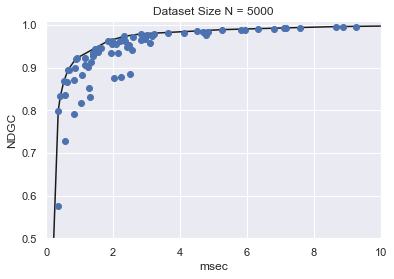

In [58]:
axlims = [0, 10, 0.5, 1.01]
idxs = plot_search(results, N_data, N_queries, axlims)


# Vary b

In [5]:
N_queries = 200

bs = range(5, 250, 20)
es = [4, 2] #error tolerance
Ls = [1, 6] #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 5000, 10
Ls, [1, 6]
bs, range(5, 250, 20)
es, [4, 2]
Ms, [11, 34]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,     5,   4.0,    11,     1,    0.566,    0.693
     0,      0,      1,     5,   4.0,    11,     6,    0.777,    0.810
     0,      1,      0,     5,   2.0,    34,     1,    1.500,    0.817
     0,      1,      1,     5,   2.0,    34,     6,    2.538,    0.870
     1,      0,      0,    25,   4.0,    11,     1,    0.646,    0.782
     1,      0,      1,    25,   4.0,    11,     6,    0.784,    0.867
     1,      1,      0,    25,   2.0,    34,     1,    1.362,    0.880
     1,      1,      1,    25,   2.0,    34,     6,    2.025,    0.928
     2,      0,      0,    45,   4.0,    11,     1,    0.864,    0.824
     2,      0,      1,    45,   4.0,    11,     6,    1.123,    0.888
     2,      1,      0,    45,   2.0,    34,     1,    1.601,    0.866
     2,      1,      1,    45,   2.0,    34,     6,    2.500,  

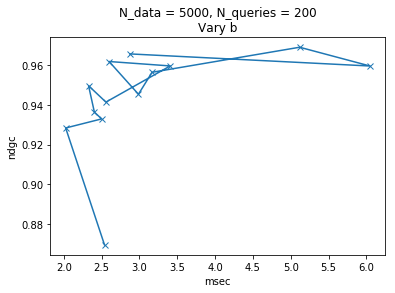

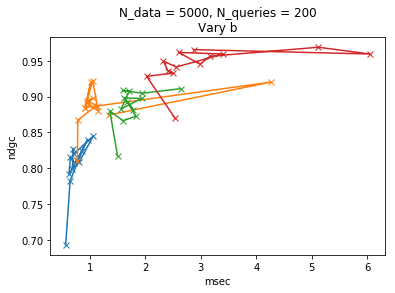

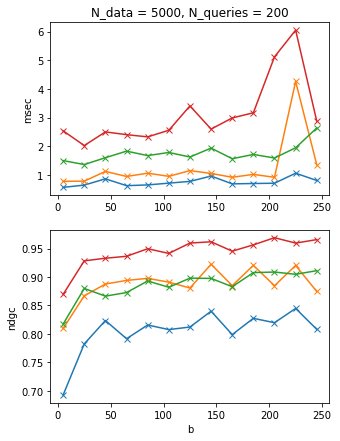

In [6]:
plot_param_search(results, 0, N_data, N_queries)

# Vary eps

In [7]:
N_queries = 200

bs = [200]
es = [9, 4, 2.7, 2.2, 1.9, 1.7, 1.5, 1.3, 1.0]
Ls = [1, 6] #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 5000, 10
Ls, [1, 6]
bs, [200]
es, [9, 4, 2.7, 2.2, 1.9, 1.7, 1.5, 1.3, 1.0]
Ms, [5, 11, 20, 29, 38, 47, 60, 81, 141]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   9.0,     5,     1,    0.536,    0.758
     0,      0,      1,   200,   9.0,     5,     6,    0.732,    0.853
     0,      1,      0,   200,   4.0,    11,     1,    0.744,    0.837
     0,      1,      1,   200,   4.0,    11,     6,    0.960,    0.913
     0,      2,      0,   200,   2.7,    20,     1,    1.040,    0.877
     0,      2,      1,   200,   2.7,    20,     6,    2.273,    0.940
     0,      3,      0,   200,   2.2,    29,     1,    1.583,    0.875
     0,      3,      1,   200,   2.2,    29,     6,    2.289,    0.948
     0,      4,      0,   200,   1.9,    38,     1,    1.767,    0.916
     0,      4,      1,   200,   1.9,    38,     6,    3.603,    0.973
     0,      5,      0,   200,   1.7,    47,     1,    3.114,    0.906
     0,     

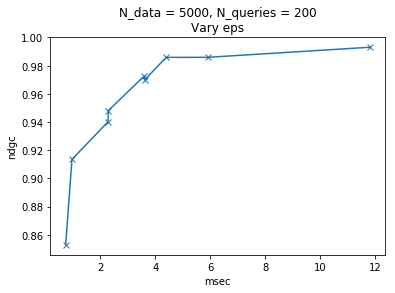

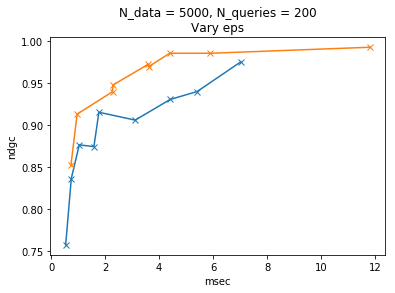

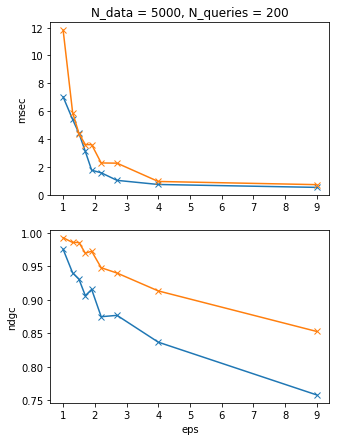

In [8]:
plot_param_search(results, 1, N_data, N_queries)

# Vary L

In [9]:
N_queries = 200

bs = [200]
es = [4, 2] #error tolerance
Ls = range(0, 20, 1) #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 5000, 10
Ls, range(0, 20)
bs, [200]
es, [4, 2]
Ms, [11, 34]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   4.0,    11,     0,    0.891,    0.744
     0,      0,      1,   200,   4.0,    11,     1,    0.905,    0.837
     0,      0,      2,   200,   4.0,    11,     2,    0.898,    0.874
     0,      0,      3,   200,   4.0,    11,     3,    0.939,    0.895
     0,      0,      4,   200,   4.0,    11,     4,    1.418,    0.908
     0,      0,      5,   200,   4.0,    11,     5,    1.529,    0.916
     0,      0,      6,   200,   4.0,    11,     6,    1.225,    0.928
     0,      0,      7,   200,   4.0,    11,     7,    1.422,    0.934
     0,      0,      8,   200,   4.0,    11,     8,    1.467,    0.936
     0,      0,      9,   200,   4.0,    11,     9,    1.410,    0.937
     0,      0,     10,   200,   4.0,    11,    10,    1.701,    0.942
     0,      0,     11,   200,   4.0,    11,    11,    1.680,    0.94

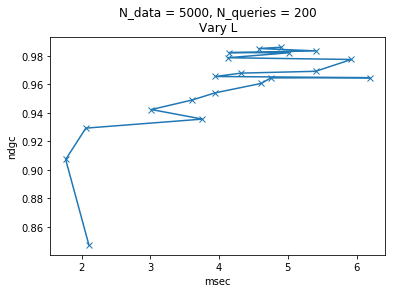

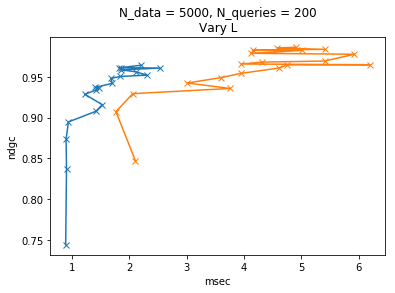

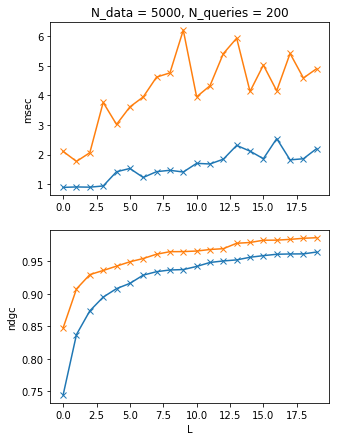

In [10]:
plot_param_search(results, 2, N_data, N_queries)